In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from scipy import stats

In [2]:
actual_gr_file = '../frequencies/southeast_asia/genotype/all_effects/seAsia_genotype_allEffects_actual_growth_rates.csv'
predicted_gr_allEffects_file = '../frequencies/southeast_asia/genotype/all_effects/seAsia_genotype_allEffects_predicted_growth_rates.csv'
predicted_gr_interserotypeEffects_file = '../frequencies/southeast_asia/genotype/interserotype_effects/seAsia_genotype_interserotypeEffects_predicted_growth_rates.csv'

In [3]:
colors = pickle.load(open('./colors.p', 'rb'))

actual_gr = pd.read_csv(actual_gr_file, index_col=0)
predicted_gr_allEffects = pd.read_csv(predicted_gr_allEffects_file, index_col=0)
predicted_gr_interserotypeEffects = pd.read_csv(predicted_gr_interserotypeEffects_file, index_col=0)

In [4]:
def plot_growth_rates(actual, predicted, ax, c, clade_type='genotype'):
    '''
    For the actual and predicted actual_frequencies, find where both values are non-null and > 0.1
    Plot actual vs. predicted
    '''
    actual = actual.loc[actual.index.isin(predicted.index.values)]

    assert predicted.columns.tolist() == actual.columns.tolist()
    assert actual.index.tolist() == predicted.index.tolist()

    actual, predicted = actual.values.flatten(), predicted.values.flatten()
    mask = (~np.isnan(actual)) & (~np.isnan(predicted))
    fit = stats.linregress(actual[mask], predicted[mask])

    sns.regplot(actual[mask], predicted[mask], color=c, ax=ax, scatter_kws={'alpha': 0.2})
    ax.set_xlabel('Actual %s growth rate'%clade_type)#, X(t+%d)/X(t)'%years_forward)
    ax.set_ylabel('Predicted %s growth rate'%clade_type)#, X(t+%d)/X(t)'%years_forward)
    ax.text(0,0.8,'pearson r = %.2f'%fit[2], transform=ax.transAxes)

    

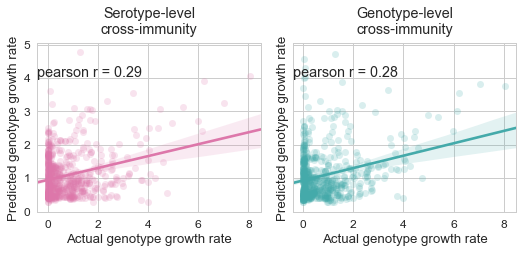

In [5]:
    
sns.set(style='whitegrid', font_scale=1.2)
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(7.5, 7.5/2))
plot_growth_rates(actual_gr, predicted_gr_interserotypeEffects, axes[0], colors['interserotype_effects'])
axes[0].set_title('Serotype-level\ncross-immunity', va='bottom')
plot_growth_rates(actual_gr, predicted_gr_allEffects, axes[1], c=colors['all_effects'])
axes[1].set_title('Genotype-level\ncross-immunity', va='bottom')
plt.tight_layout()
plt.savefig('./png/genotype_growth_rates.png', dpi=300, bbox_inches='tight')
plt.show()

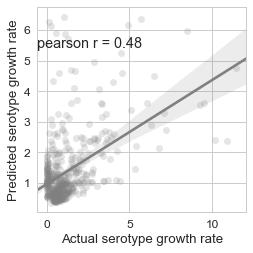

In [6]:
actual_serotype_gr = pd.read_csv('../frequencies/southeast_asia/serotype/serotypeseAsia_serotype_actual_growth_rates.csv', index_col=0)
predicted_serotype_gr = pd.read_csv('../frequencies/southeast_asia/serotype/serotypeseAsia_serotype_predicted_growth_rates.csv', index_col=0)

fig, ax = plt.subplots(figsize=(7.5/2, 7.5/2))
plot_growth_rates(actual_serotype_gr, predicted_serotype_gr, ax, 'gray', clade_type='serotype')
plt.savefig('./png/serotype_growth_rates.png', dpi=300, bbox_inches='tight')
plt.tight_layout()